<a href="https://colab.research.google.com/github/YAMINISARASWATHI04/MachineLearning/blob/main/DeeplearningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet For classification

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
rows = 10000
cols = 6
n_labels = 3
np.random.seed(42)
attributes=np.random.uniform(low=0,high=1,size=(rows,cols))
labels=((attributes[:,0]*attributes[:,2]**2-attributes[:,3]*attributes[:,4])*10).astype(int)%n_labels
columns=[f"Attributes_{i+1}" for i in range(cols)]+["Label"]
data = pd.DataFrame(
    np.concatenate((attributes, labels.reshape(-1, 1)), axis=1),
    columns=columns
)


In [ ]:
print(data.head(10))

   Attributes_1  Attributes_2  Attributes_3  Attributes_4  Attributes_5  \
0      0.374540      0.950714      0.731994      0.598658      0.156019   
1      0.058084      0.866176      0.601115      0.708073      0.020584   
2      0.832443      0.212339      0.181825      0.183405      0.304242   
3      0.431945      0.291229      0.611853      0.139494      0.292145   
4      0.456070      0.785176      0.199674      0.514234      0.592415   
5      0.607545      0.170524      0.065052      0.948886      0.965632   
6      0.304614      0.097672      0.684233      0.440152      0.122038   
7      0.034389      0.909320      0.258780      0.662522      0.311711   
8      0.546710      0.184854      0.969585      0.775133      0.939499   
9      0.597900      0.921874      0.088493      0.195983      0.045227   

   Attributes_6  Label  
0      0.155995    1.0  
1      0.969910    0.0  
2      0.524756    0.0  
3      0.366362    1.0  
4      0.046450    1.0  
5      0.808397    0.0  

In [ ]:
data.to_csv("classification_dataset.csv", index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download("classification_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data For Regression

In [ ]:


np.random.seed(42)

rows = 10000
cols = 6

x = np.random.normal(size=(rows, cols))


coeff = np.random.uniform(-2, 2, size=cols)
interaction_coefficients = np.random.uniform(-1, 1, size=(cols, cols))
interaction_coefficients = np.triu(interaction_coefficients, k=1)  # Use upper triangular for interactions only

y = x @ coeff + np.sum(
    np.array([interaction_coefficients[i, j] * x[:, i] * x[:, j]
              for i in range(cols) for j in range(i + 1, cols)]),
    axis=0
) + np.random.normal(scale=0.5, size=rows)  # Add noise


data = pd.DataFrame(x, columns=[f"Feature_{i+1}" for i in range(cols)])
data['Target'] = y


data.to_csv('synthetic_regression_dataset.csv', index=False)
print(data.head())




   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6    Target
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137  2.389995
1   1.579213   0.767435  -0.469474   0.542560  -0.463418  -0.465730  0.596282
2   0.241962  -1.913280  -1.724918  -0.562288  -1.012831   0.314247 -7.676085
3  -0.908024  -1.412304   1.465649  -0.225776   0.067528  -1.424748  3.319911
4  -0.544383   0.110923  -1.150994   0.375698  -0.600639  -0.291694 -1.398571


In [ ]:
files.download('synthetic_regression_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset for Clustering

In [ ]:

np.random.seed(42)

n_clusters = 5

centers = np.random.uniform(-5, 5, size=(n_clusters, cols))

cluster_labels = np.random.choice(n_clusters, size=rows)


data = np.zeros((rows, cols))
for i in range(rows):

    center = centers[cluster_labels[i]]

    instance = center + np.random.normal(scale=0.5, size=cols)

    interactions = np.array([instance[j] * instance[k] for j in range(cols) for k in range(j + 1, cols)])
    interaction_effect = np.sum(interactions) * 0.01  # Scale down interaction effect
    data[i] = instance + interaction_effect

df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(cols)])
df['Cluster'] = cluster_labels

df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Cluster
0,3.837658,-3.062146,-2.623254,-3.750612,-1.697449,-0.098560,2
1,-0.451593,3.122068,-2.849057,0.064033,0.121921,-4.283319,4
2,-0.985028,3.739500,1.625781,1.277219,-3.790179,-4.121256,0
3,-4.687973,2.937413,0.686585,1.469036,-5.362997,4.849211,1
4,-1.619385,-1.514906,1.886682,-3.620631,-1.314244,-1.520466,3


In [ ]:
df.to_csv('synthetic_clustering_dataset.csv', index=False)

files.download('synthetic_clustering_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Non Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

df = pd.read_csv('synthetic_regression_dataset.csv')

x = df.drop(columns=['Target'])
y = df['Target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(x_train, y_train)


y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")

if test_r2 >= 0.90:
    print("The model achieved 90% or higher accuracy!")
else:
    print("The model did not achieve 90% accuracy. Consider hyperparameter tuning.")


Training R² Score: 0.99
Testing R² Score: 0.96
The model achieved 90% or higher accuracy!


# Classifcation Models

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('synthetic_clustering_dataset.csv')

x = df.drop(columns=['Cluster'])
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

metrics = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

metrics_df = pd.DataFrame(metrics)

print(metrics_df)


                    Model  Accuracy  Precision  Recall  F1-Score
0     Logistic Regression     1.000   1.000000   1.000     1.000
1           Random Forest     1.000   1.000000   1.000     1.000
2  Support Vector Machine     1.000   1.000000   1.000     1.000
3       Gradient Boosting     0.999   0.999005   0.999     0.999
4     K-Nearest Neighbors     1.000   1.000000   1.000     1.000


# Load DataSets


In [ ]:
import json


In [ ]:


df_csv = pd.read_csv('/content/weight-height.csv')

train_csv, test_csv = train_test_split(df_csv, test_size=0.3, random_state=42)

print("CSV Train Shape:", train_csv.shape)
print("CSV Test Shape:", test_csv.shape)



CSV Train Shape: (7000, 3)
CSV Test Shape: (3000, 3)


In [ ]:
df_excel = pd.read_excel('/content/Courses.xlsx')


train_excel, test_excel = train_test_split(df_excel, test_size=0.3, random_state=42)

print("Excel Train Shape:", train_excel.shape)
print("Excel Test Shape:", test_excel.shape)

Excel Train Shape: (16, 10)
Excel Test Shape: (8, 10)


In [ ]:
with open('/content/sample_data/anscombe.json', 'r') as f:
    json_data = json.load(f)
df_json = pd.DataFrame(json_data)

train_json, test_json = train_test_split(df_json, test_size=0.3, random_state=42)

print("JSON Train Shape:", train_json.shape)
print("JSON Test Shape:", test_json.shape)

JSON Train Shape: (30, 3)
JSON Test Shape: (14, 3)


# From Website

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url_csv = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]

df_csv = pd.read_csv(url_csv, header=None, names=columns)

df_csv['Diagnosis'] = df_csv['Diagnosis'].map({'M': 1, 'B': 0})

df_csv = df_csv.drop(columns=['ID'])

X_csv = df_csv.drop(columns=['Diagnosis'])
y_csv = df_csv['Diagnosis']

X_train_csv, X_test_csv, y_train_csv, y_test_csv = train_test_split(X_csv, y_csv, test_size=0.3, random_state=42)

print("CSV Data:")
print("Training Features Shape:", X_train_csv.shape)
print("Testing Features Shape:", X_test_csv.shape)


CSV Data:
Training Features Shape: (398, 30)
Testing Features Shape: (171, 30)


In [ ]:
from sklearn.datasets import load_iris, load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize_data(X_train, X_test, method='minmax'):
    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'zscore':
        scaler = StandardScaler()
    else:
        raise ValueError("Normalization method must be 'minmax' or 'zscore'")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

datasets = {
    'Iris': load_iris(),
    'Diabetes': load_diabetes(),
    'Breast Cancer': load_breast_cancer()
}

for dataset_name, dataset in datasets.items():
    print(f"Processing {dataset_name} Dataset...")


    X, y = dataset.data, dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_minmax, X_test_minmax = normalize_data(X_train, X_test, method='minmax')

    X_train_zscore, X_test_zscore = normalize_data(X_train, X_test, method='zscore')

    # Display results
    print(f"Original Training Data Shape: {X_train.shape}")
    print(f"Min-Max Scaled Training Data Shape: {X_train_minmax.shape}")
    print(f"Z-Score Normalized Training Data Shape: {X_train_zscore.shape}")
    print()


Processing Iris Dataset...
Original Training Data Shape: (105, 4)
Min-Max Scaled Training Data Shape: (105, 4)
Z-Score Normalized Training Data Shape: (105, 4)

Processing Diabetes Dataset...
Original Training Data Shape: (309, 10)
Min-Max Scaled Training Data Shape: (309, 10)
Z-Score Normalized Training Data Shape: (309, 10)

Processing Breast Cancer Dataset...
Original Training Data Shape: (398, 30)
Min-Max Scaled Training Data Shape: (398, 30)
Z-Score Normalized Training Data Shape: (398, 30)



R² Score (Ridge Regression): 0.5959
R² Score (Lasso Regression): 0.5977


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

auto_mpg = fetch_ucirepo(id=9)


X = auto_mpg.data.features
y = auto_mpg.data.targets



imputer = SimpleImputer(strategy='mean')
X['horsepower'] = imputer.fit_transform(X[['horsepower']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score (Ridge Regression): {r2_ridge:.4f}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² Score (Lasso Regression): {r2_lasso:.4f}")


R² Score (Ridge Regression): 0.8378
R² Score (Lasso Regression): 0.8379


<ipython-input-55-19b0eb5dde73>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'] = imputer.fit_transform(X[['horsepower']])


## Clustering methods forDigits Dataset

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

digits = datasets.load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_homogeneity = homogeneity_score(y, kmeans_labels)

dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
dbscan_ari = adjusted_rand_score(y, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
dbscan_homogeneity = homogeneity_score(y, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print("KMeans Clustering Metrics:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"Homogeneity Score: {kmeans_homogeneity:.4f}")

print("\nDBSCAN Clustering Metrics:")
print(f"Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {dbscan_ari:.4f}")
print(f"Homogeneity Score: {dbscan_homogeneity:.4f}")


KMeans Clustering Metrics:
Silhouette Score: 0.1356
Adjusted Rand Index (ARI): 0.5305
Homogeneity Score: 0.6393

DBSCAN Clustering Metrics:
Silhouette Score: -1.0000
Adjusted Rand Index (ARI): -1.0000
Homogeneity Score: -1.0000


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(X_scaled)

In [ ]:
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_ari = adjusted_rand_score(y, agg_labels)  # Use true labels for ARI
agg_homogeneity = homogeneity_score(y, agg_labels)


In [ ]:
print("Agglomerative Clustering Metrics:")
print(f"Silhouette Score: {agg_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {agg_ari:.4f}")
print(f"Homogeneity Score: {agg_homogeneity:.4f}")

Agglomerative Clustering Metrics:
Silhouette Score: 0.0916
Adjusted Rand Index (ARI): 0.2761
Homogeneity Score: 0.3627


# Data Wraggling Techniques

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
columns = iris.feature_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=columns)
df['class'] = y

# Standardize the data

Split


In [ ]:
x_train,x_test,y_train,y_train = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print(train_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
81                 5.5               2.4                3.7               1.0   
133                6.3               2.8                5.1               1.5   
137                6.4               3.1                5.5               1.8   
75                 6.6               3.0                4.4               1.4   
109                7.2               3.6                6.1               2.5   
..                 ...               ...                ...               ...   
71                 6.1               2.8                4.0               1.3   
106                4.9               2.5                4.5               1.7   
14                 5.8               4.0                1.2               0.2   
92                 5.8               2.6                4.0               1.2   
102                7.1               3.0                5.9               2.1   

     class  
81       1  
1

In [ ]:
print(test_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
73                 6.1               2.8                4.7               1.2   
18                 5.7               3.8                1.7               0.3   
118                7.7               2.6                6.9               2.3   
78                 6.0               2.9                4.5               1.5   
76                 6.8               2.8                4.8               1.4   
31                 5.4               3.4                1.5               0.4   
64                 5.6               2.9                3.6               1.3   
141                6.9               3.1                5.1               2.3   
68                 6.2               2.2                4.5               1.5   
82                 5.8               2.7                3.9               1.2   
110                6.5               3.2                5.1               2.0   
12                 4.8      

Merge


In [ ]:
# Example of merging DataFrames
merged_df = pd.merge(train_data, test_data, how='inner', on='class')
merged_df

,sepal length (cm)_x,sepal width (cm)_x,petal length (cm)_x,petal width (cm)_x,class,sepal length (cm)_y,sepal width (cm)_y,petal length (cm)_y,petal width (cm)_y
0,5.5,2.4,3.7,1.0,1,6.1,2.8,4.7,1.2
1,5.5,2.4,3.7,1.0,1,6.0,2.9,4.5,1.5
2,5.5,2.4,3.7,1.0,1,6.8,2.8,4.8,1.4
3,5.5,2.4,3.7,1.0,1,5.6,2.9,3.6,1.3
4,5.5,2.4,3.7,1.0,1,6.2,2.2,4.5,1.5
...,...,...,...,...,...,...,...,...,...
1546,7.1,3.0,5.9,2.1,2,6.7,3.0,5.2,2.3
1547,7.1,3.0,5.9,2.1,2,6.7,2.5,5.8,1.8
1548,7.1,3.0,5.9,2.1,2,6.8,3.2,5.9,2.3
1549,7.1,3.0,5.9,2.1,2,6.3,2.5,5.0,1.9


Select Rows by Conditions

In [ ]:
rows_condition = df[df['sepal length (cm)'] > 5.0]
print("Rows where sepal length > 5.0:")
print(rows_condition.head())

Rows where sepal length > 5.0:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
10                5.4               3.7                1.5               0.2   
14                5.8               4.0                1.2               0.2   
15                5.7               4.4                1.5               0.4   

    class  
0       0  
5       0  
10      0  
14      0  
15      0  


 Select columns by conditions

In [ ]:
columns_condition = df[['sepal width (cm)', 'petal length (cm)']]
print("Selected columns:")
print(columns_condition.head())

Selected columns:
   sepal width (cm)  petal length (cm)
0               3.5                1.4
1               3.0                1.4
2               3.2                1.3
3               3.1                1.5
4               3.6                1.4


Rename columns

In [ ]:
df_renamed = df.rename(columns={'sepal length (cm)': 'sepal_length'})
print("Renamed columns:")
print(df_renamed.head())


Renamed columns:
   sepal_length  sepal width (cm)  petal length (cm)  petal width (cm)  class
0           5.1               3.5                1.4               0.2      0
1           4.9               3.0                1.4               0.2      0
2           4.7               3.2                1.3               0.2      0
3           4.6               3.1                1.5               0.2      0
4           5.0               3.6                1.4               0.2      0


Min, max, avg, variance

In [ ]:
min_value = df['sepal length (cm)'].min()
max_value = df['sepal length (cm)'].max()
mean_value = df['sepal length (cm)'].mean()
variance_value = df['sepal length (cm)'].var()

print(f"Min: {min_value}, Max: {max_value}, Avg: {mean_value}, Variance: {variance_value}")


Min: 4.3, Max: 7.9, Avg: 5.843333333333334, Variance: 0.6856935123042505


Describe

In [ ]:
summary = df.describe()
print("Summary statistics:")
print(summary)


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Size

In [ ]:
print("Size of the DataFrame:", df.size)


Size of the DataFrame: 750


Shape

In [ ]:
print("Shape of the DataFrame:", df.shape)


Shape of the DataFrame: (150, 5)


Find unique values

In [ ]:
unique_values = df['class'].unique()
print("Unique values in the 'class' column:", unique_values)


Unique values in the 'class' column: [0 1 2]


Find missing values and fill them

In [ ]:
df_missing = df.copy()
df_missing.loc[0:5, 'sepal length (cm)'] = None  # Simulate missing values
df_filled = df_missing.fillna(df_missing.mean())
print("Filled missing values with mean:")
print(df_filled.head())


Filled missing values with mean:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           5.880556               3.5                1.4               0.2   
1           5.880556               3.0                1.4               0.2   
2           5.880556               3.2                1.3               0.2   
3           5.880556               3.1                1.5               0.2   
4           5.880556               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


Replace attribute value name

In [ ]:
df_replaced = df.copy()
df_replaced['class'] = df_replaced['class'].replace({0: 'Iris-setosa'})
print("Replaced attribute values in 'class' column:")
print(df_replaced.head())


Replaced attribute values in 'class' column:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


Delete columns

In [ ]:
df_dropped_col = df.drop(columns=['petal width (cm)'])
print("Deleted column 'petal width (cm)':")
print(df_dropped_col.head())


Deleted column 'petal width (cm)':
   sepal length (cm)  sepal width (cm)  petal length (cm)  class
0                5.1               3.5                1.4      0
1                4.9               3.0                1.4      0
2                4.7               3.2                1.3      0
3                4.6               3.1                1.5      0
4                5.0               3.6                1.4      0


 Delete some rows

In [ ]:
df_dropped_rows = df.drop(index=[0, 1, 2, 3, 4])
print("Deleted first 5 rows:")
print(df_dropped_rows.head())


Deleted first 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   class  
5      0  
6      0  
7      0  
8      0  
9      0  


 Join datasets

In [ ]:
df_left = df.iloc[:75]
df_right = df.iloc[75:]
df_joined = pd.merge(df_left, df_right, how='outer')
print("Joined dataset shape:", df_joined.shape)


Joined dataset shape: (150, 5)


Group values by rows

In [ ]:
grouped = df.groupby('class').mean()
print("Grouped by class column:")
print(grouped)


Grouped by class column:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
class                                                           
0                  5.006             3.428              1.462   
1                  5.936             2.770              4.260   
2                  6.588             2.974              5.552   

       petal width (cm)  
class                    
0                 0.246  
1                 1.326  
2                 2.026  


Loop over columns

In [ ]:
for col in df.columns:
    print(f"{col}:\n{df[col].head()}")


sepal length (cm):
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64
sepal width (cm):
0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64
petal length (cm):
0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64
petal width (cm):
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal width (cm), dtype: float64
class:
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


Group rows by time

In [ ]:
df['time'] = pd.date_range(start='1/1/2023', periods=len(df), freq='T')
grouped_time = df.groupby(pd.Grouper(key='time', freq='5T')).mean()
print("Grouped by time (5-minute intervals):")
print(grouped_time)


Grouped by time (5-minute intervals):
                     sepal length (cm)  sepal width (cm)  petal length (cm)  \
time                                                                          
2023-01-01 00:00:00               4.86              3.28               1.40   
2023-01-01 00:05:00               4.86              3.34               1.50   
2023-01-01 00:10:00               5.02              3.42               1.36   
2023-01-01 00:15:00               5.40              3.88               1.48   
2023-01-01 00:20:00               5.00              3.48               1.56   
2023-01-01 00:25:00               5.02              3.30               1.54   
2023-01-01 00:30:00               5.16              3.58               1.50   
2023-01-01 00:35:00               4.98              3.34               1.34   
2023-01-01 00:40:00               4.80              3.26               1.48   
2023-01-01 00:45:00               4.96              3.40               1.46   
2023-01-01 00:

<ipython-input-90-77f4d42b5ae5>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['time'] = pd.date_range(start='1/1/2023', periods=len(df), freq='T')
<ipython-input-90-77f4d42b5ae5>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  grouped_time = df.groupby(pd.Grouper(key='time', freq='5T')).mean()


Concatenate datasets

In [ ]:
df_concat = pd.concat([df, df])
print("Concatenated dataset shape:", df_concat.shape)


Concatenated dataset shape: (300, 6)


In [ ]:
iris = load_iris()

# Create a DataFrame with the feature data and column names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target (class) column to the DataFrame
df['class'] = iris.target

# Display the first few rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


 Append rows

In [ ]:
new_row = pd.DataFrame([[5.0, 3.5, 1.5, 0.2, 0]], columns=df.columns)

df_appended = pd.concat([df, new_row], ignore_index=True)

print("Appended rows:")
print(df_appended.tail())

Appended rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   
150                5.0               3.5                1.5               0.2   

     class  
146      2  
147      2  
148      2  
149      2  
150      0  


Append Columns

In [ ]:
df['new_column'] = df['sepal length (cm)'] * 2
print("Appended a new column:")
print(df.head())

Appended a new column:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  new_column  
0      0        10.2  
1      0         9.8  
2      0         9.4  
3      0         9.2  
4      0        10.0  


Reorder columns

In [ ]:
df_reordered = df[['class', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
print("Reordered columns:")
print(df_reordered.head())


Reordered columns:
   class  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      0                5.1               3.5                1.4   
1      0                4.9               3.0                1.4   
2      0                4.7               3.2                1.3   
3      0                4.6               3.1                1.5   
4      0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  


# Handling Imbalanced Dataset

Class distribution before balancing:
target
1    357
0    212
Name: count, dtype: int64


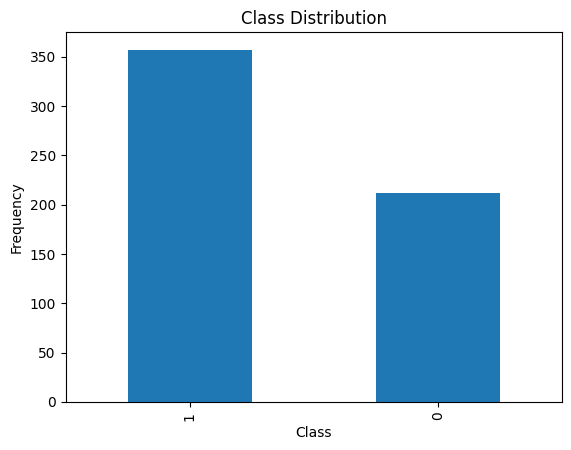

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

class_distribution = df['target'].value_counts()
print("Class distribution before balancing:")
print(class_distribution)

class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


Class distribution after undersampling:
target
1    357
0    212
Name: count, dtype: int64


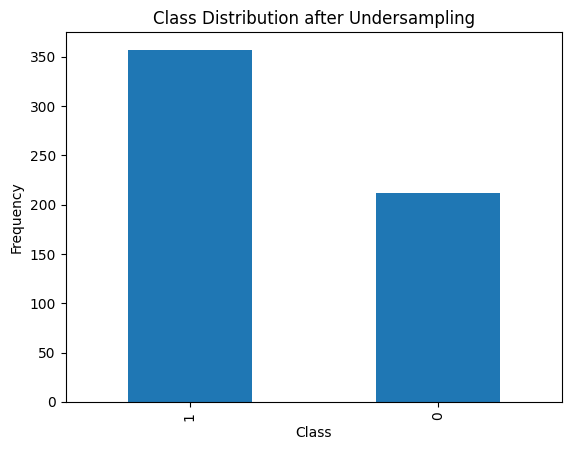

In [ ]:
from sklearn.utils import resample
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]

n_samples = len(df_majority)  # Sample as much as the majority class size

df_majority_undersampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_majority), # match minority class size
                                    random_state=42)  # for reproducibility

df_undersampled = pd.concat([df_majority_undersampled, df_minority])

print("Class distribution after undersampling:")
print(df_undersampled['target'].value_counts())

df_undersampled['target'].value_counts().plot(kind='bar', title='Class Distribution after Undersampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


Class distribution after oversampling:
target
0    212
1    212
Name: count, dtype: int64


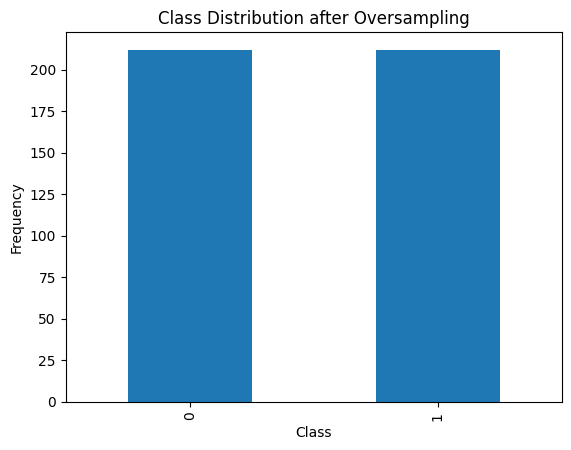

In [ ]:
# Oversample the minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,      # sample with replacement
                                   n_samples=len(df_majority),  # match majority class size
                                   random_state=42)

# Combine the oversampled minority class with the majority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Check new class distribution
print("Class distribution after oversampling:")
print(df_oversampled['target'].value_counts())

# Plot the class distribution after oversampling
df_oversampled['target'].value_counts().plot(kind='bar', title='Class Distribution after Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
best_k = 0
best_accuracy = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

Accuracy for k=1: 1.0000
Accuracy for k=2: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=4: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=6: 1.0000
Accuracy for k=7: 0.9667
Accuracy for k=8: 1.0000
Accuracy for k=9: 1.0000
Accuracy for k=10: 1.0000


In [ ]:
print(f"Best k value is {best_k} with an accuracy of {best_accuracy:.4f}")

Best k value is 1 with an accuracy of 1.0000


In [ ]:
random_index = np.random.randint(0, len(X_test))
new_tuple = X_test[random_index].reshape(1, -1)

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
distances, indices = knn_best.kneighbors(new_tuple)

In [ ]:
print(f"Indices of the nearest neighbors: {indices}")
print(f"Distances of the nearest neighbors: {distances}")

predicted_class = knn_best.predict(new_tuple)
print(f"Predicted class for the new tuple: {predicted_class}")

Indices of the nearest neighbors: [[107]]
Distances of the nearest neighbors: [[0.6]]
Predicted class for the new tuple: [2]


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = datasets.load_iris()
X = iris.data[iris.target != 2,:2]  # Only classes 0 and 1
y = iris.target[iris.target != 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True)

In [ ]:
support_vectors = svm_model.support_vectors_

support_vector_indices = svm_model.support_

decision_function_values = svm_model.decision_function(X_test_scaled)

probabilities = svm_model.predict_proba(X_test_scaled)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy Score: 1.0


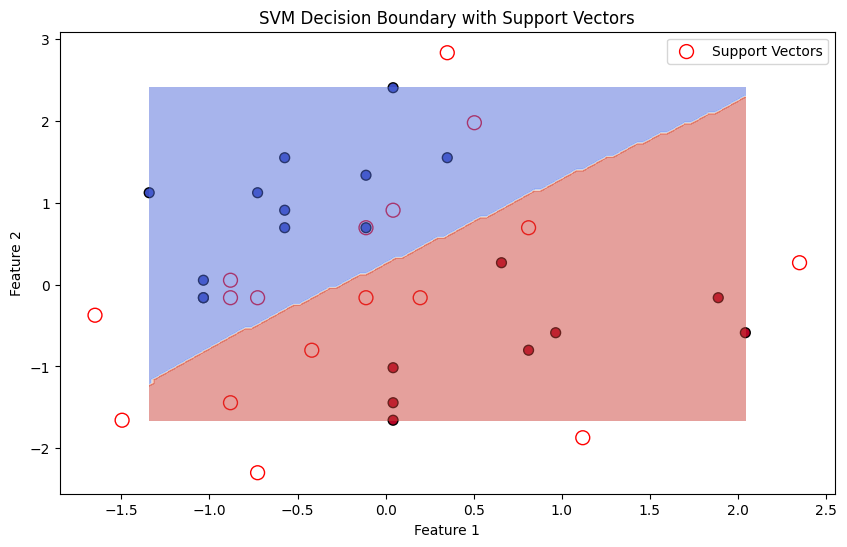

Support Vectors:
[[ 0.34989908  2.83377893]
 [-0.88051527  0.05346753]
 [-0.72671348 -0.16040258]
 [-1.64952424 -0.37427269]
 [ 0.04229549  0.90894796]
 [-1.49572245 -1.65749334]
 [-0.88051527 -0.16040258]
 [-0.1115063   0.69507785]
 [ 0.50370088  1.9782985 ]
 [ 0.81130447  0.69507785]
 [ 0.19609729 -0.16040258]
 [ 2.34932241  0.26733764]
 [ 1.11890805 -1.87136345]
 [-0.88051527 -1.44362323]
 [-0.41910989 -0.80201291]
 [-0.1115063  -0.16040258]
 [-0.72671348 -2.29910366]]
Predicted probabilities for the first test sample:
[0.00629347 0.99370653]


In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolors='k')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='r', s=100, label="Support Vectors")

xx, yy = np.meshgrid(np.linspace(X_test_scaled[:, 0].min(), X_test_scaled[:, 0].max(), 100),
                     np.linspace(X_test_scaled[:, 1].min(), X_test_scaled[:, 1].max(), 100))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print("Support Vectors:")
print(support_vectors)

print("Predicted probabilities for the first test sample:")
print(probabilities[0])

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
target = data['Survived']
features['Age'].fillna(features['Age'].median(), inplace=True)
categorical_features = ['Sex', 'Pclass']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
preprocessor = ColumnTransformer(transformers=[('num', 'passthrough', numerical_features), ('cat', OneHotEncoder(), categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
new_tuple = pd.DataFrame({'Pclass': [1], 'Sex': ['female'], 'Age': [29], 'SibSp': [0], 'Parch': [0], 'Fare': [100]})
predicted_class = pipeline.predict(new_tuple)
predicted_probabilities = pipeline.predict_proba(new_tuple)
print(f"Predicted class for the new tuple: {predicted_class[0]}")
print(f"Predicted probabilities: {predicted_probabilities[0]}")

<ipython-input-154-ab266ded8b17>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['Age'].fillna(features['Age'].median(), inplace=True)
<ipython-input-154-ab266ded8b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'].fillna(features['Age'].median(), inplace=True)


Predicted class for the new tuple: 1
Predicted probabilities: [0. 1.]


# Image and Audio

In [ ]:

import matplotlib.pyplot as plt
import librosa
import librosa.display
from PIL import Image

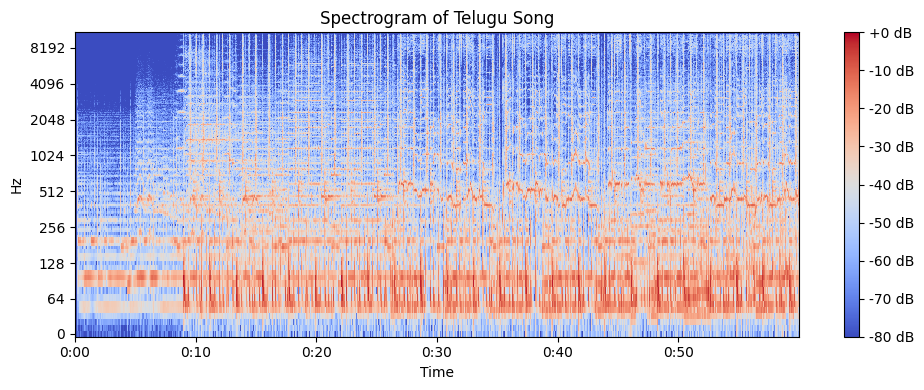

In [ ]:
audio_file = '/content/04 - Anukoledenadu - SenSongsMp3.co.mp3'
y, sr = librosa.load(audio_file, duration=60)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Telugu Song')
plt.tight_layout()
plt.show()

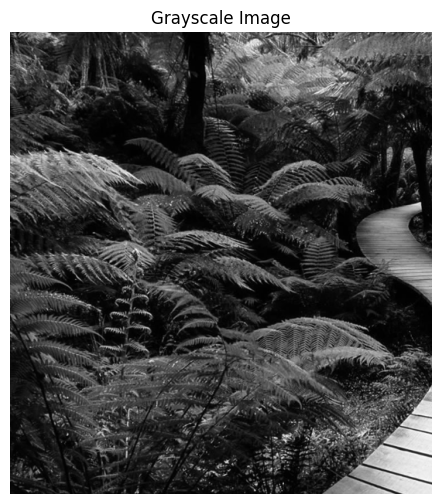

In [ ]:
image_file = '/content/Screenshot 2024-06-29 152322.png'
color_image = Image.open(image_file)

gray_image = color_image.convert('L')
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()